### Data Shifting Experiment

### HAM 10000

* [Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)

* [Original Paper](https://www.nature.com/articles/sdata2018161)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results, update_column_names

In [3]:
PATH = 'Embeddings_vlm/ham10000/'
FILE = 'embeddings_clip.csv'
DATASET = 'ham10000'

batch_size = 64
lr = 3e-4

multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.drop(columns=['image_id', 'text'], inplace=True)
df.head()

dx  split  image_embedding_0  image_embedding_1  image_embedding_2  \
0     nv  train           0.017459          -0.006133           0.042509   
1     nv  train           0.013314          -0.004718           0.036896   
2  akiec  train           0.023076          -0.006460           0.046531   
3     nv  train           0.002341          -0.042092           0.056254   
4     nv  train           0.012029          -0.003644           0.028491   

   image_embedding_3  image_embedding_4  image_embedding_5  image_embedding_6  \
0           0.032119          -0.020298          -0.029999          -0.019345   
1           0.013657          -0.018710          -0.000790          -0.018275   
2          -0.007525          -0.052272           0.024759          -0.004904   
3           0.000176          -0.013943           0.011410           0.002411   
4           0.017455          -0.017562          -0.005040           0.016783   

   image_embedding_7  ...  text_embedding_502  text_embedding_503  \
0          -0.005980  ...           -0.085103           -0.035549   
1           0.021898  ...           -0.024121            0.001504   
2           0.024593  ...           -0.076046           -0.025927   
3           0.001611  ...           -0.017013           -0.020450   
4           0.031028  ...           -0.093017           -0.022929   

   text_embedding_504  text_embedding_505  text_embedding_506  \
0            0.022616            0.014842           -0.010682   
1            0.007381            0.028216           -0.033343   
2            0.019258            0.013950           -0.013910   
3            0.020093            0.021699           -0.018428   
4            0.013042            0.007998           -0.020830   

   text_embedding_507  text_embedding_508  text_embedding_509  \
0            0.007425           -0.010183            0.059058   
1           -0.007173            0.025764            0.037911   
2            0.000220           -0.016514            0.060165   
3            0.018907            0.022027            0.045309   
4           -0.015631           -0.007309            0.057171   

   text_embedding_510  text_embedding_511  
0            0.028891            0.073401  
1           -0.028967            0.032034  
2            0.028732            0.068683  
3           -0.014772            0.017288  
4            0.030298            0.068561  

[5 rows x 1026 columns]

In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'dx'
output_size = len(pd.unique(df[label_columns]))

### Run Experiments

##################################################  Shift -1  ##################################################


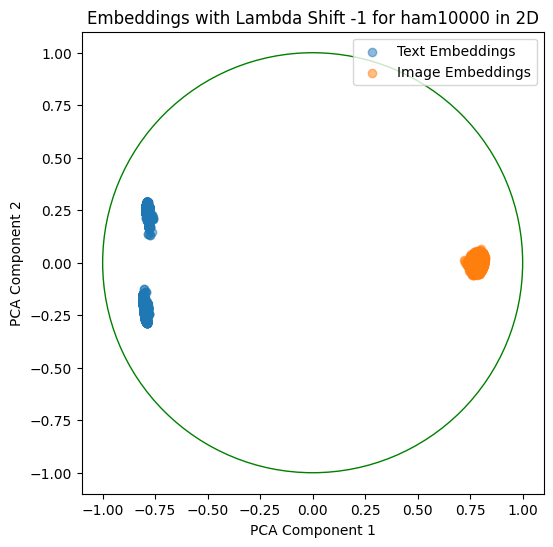

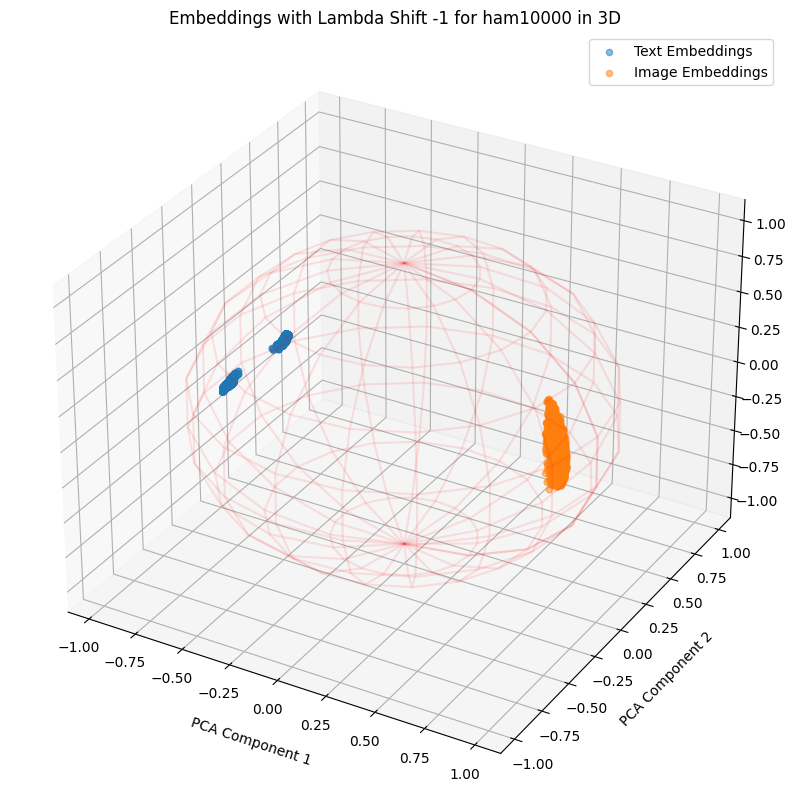

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.48 seconds
Total Training Time per Epoch: 24.18 seconds
Average Inference Time per Epoch: 0.15 seconds
Total Inference Time per Epoch: 7.47 seconds


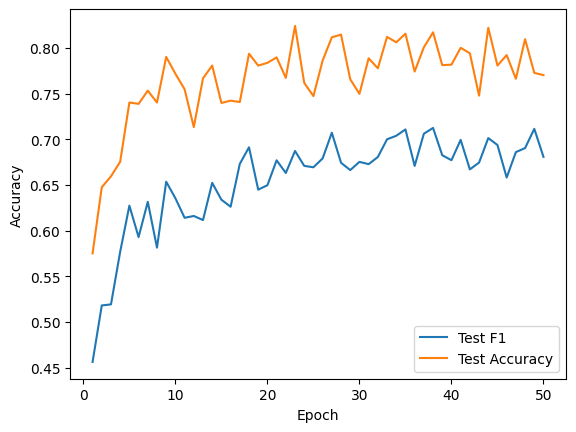

Best Accuracy: {'Acc': 0.8242636045931103, 'F1': 0.6873003101867284, 'Epoch': 23}
Best Macro-F1: {'Acc': 0.8172740888666999, 'F1': 0.7125369905581292, 'Epoch': 38}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.53 seconds
Total Training Time per Epoch: 26.50 seconds
Average Inference Time per Epoch: 0.15 seconds
Total Inference Time per Epoch: 7.57 seconds


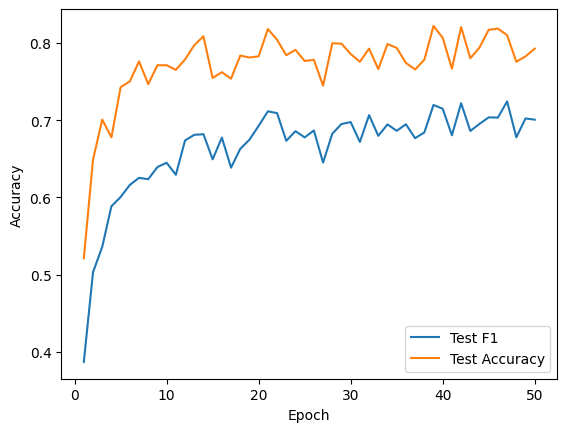

Best Accuracy: {'Acc': 0.8222666000998502, 'F1': 0.7198283883815811, 'Epoch': 39}
Best Macro-F1: {'Acc': 0.8102845731402896, 'F1': 0.7244669633661801, 'Epoch': 47}
##################################################  Shift -0.9  ##################################################


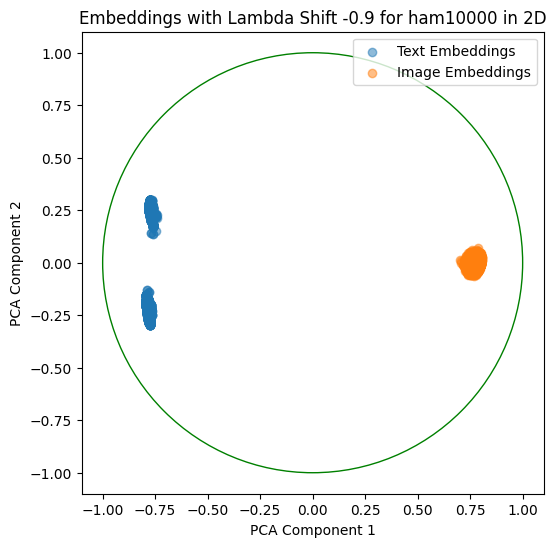

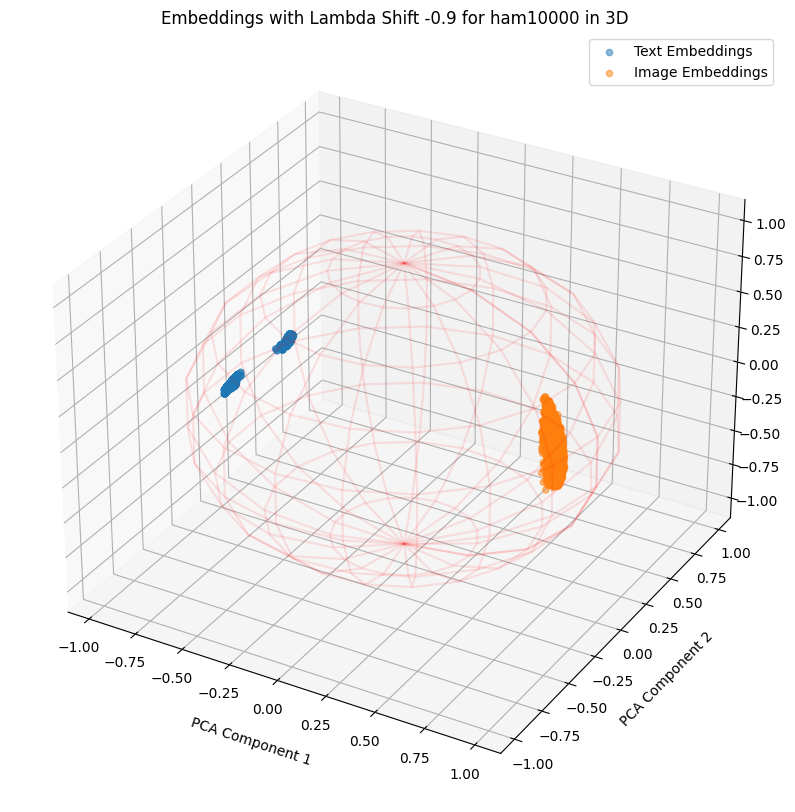

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.49 seconds
Total Training Time per Epoch: 24.61 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 7.79 seconds


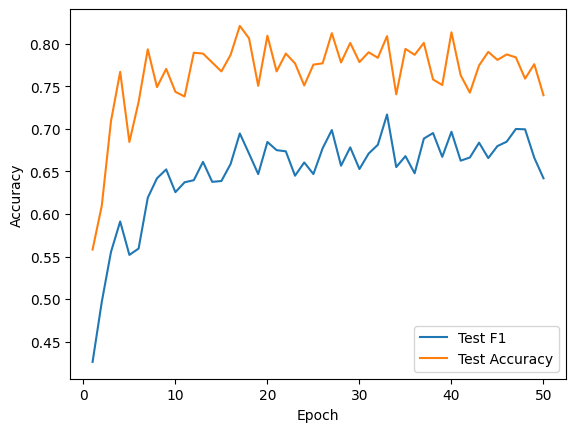

Best Accuracy: {'Acc': 0.8207688467299051, 'F1': 0.6945175193167917, 'Epoch': 17}
Best Macro-F1: {'Acc': 0.8087868197703445, 'F1': 0.7167366190837428, 'Epoch': 33}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.55 seconds
Total Training Time per Epoch: 27.40 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 7.79 seconds


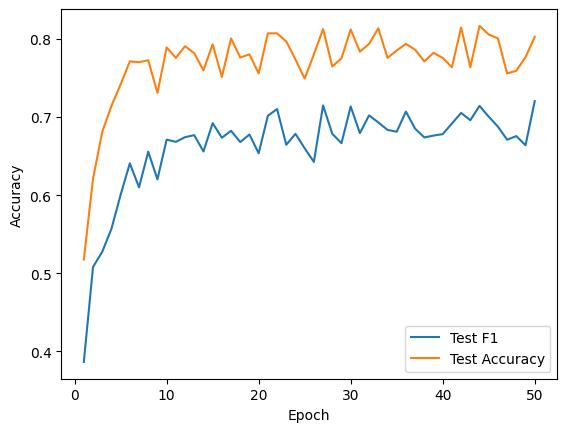

Best Accuracy: {'Acc': 0.8167748377433849, 'F1': 0.7143781722375475, 'Epoch': 44}
Best Macro-F1: {'Acc': 0.8027958062905641, 'F1': 0.7204597726724874, 'Epoch': 50}
##################################################  Shift -0.8  ##################################################


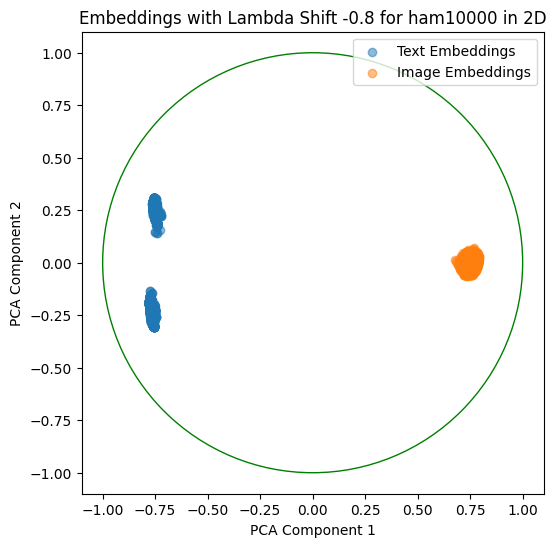

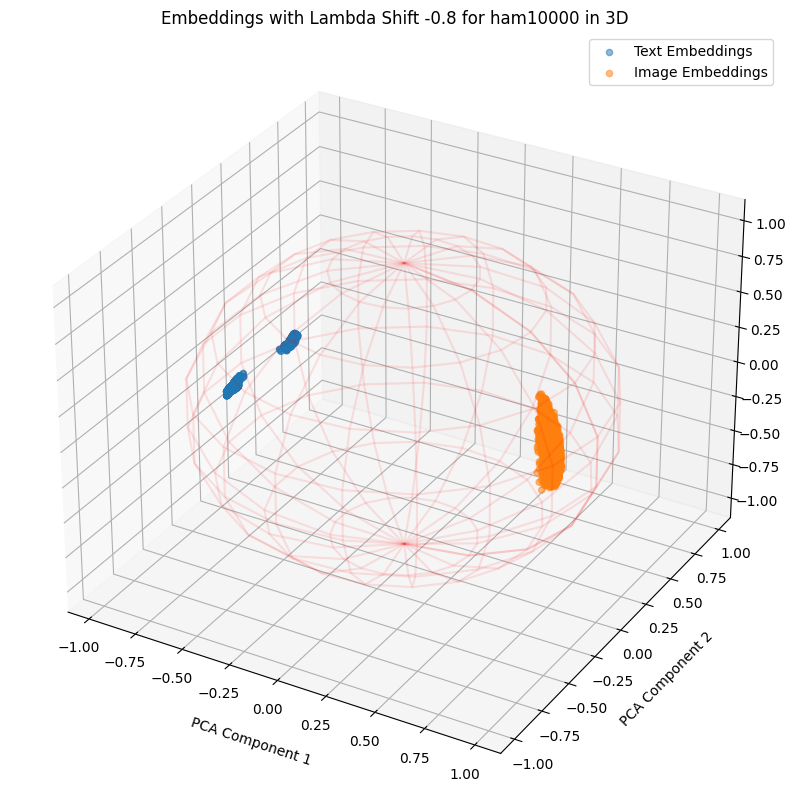

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.60 seconds
Total Training Time per Epoch: 29.84 seconds
Average Inference Time per Epoch: 0.20 seconds
Total Inference Time per Epoch: 9.85 seconds


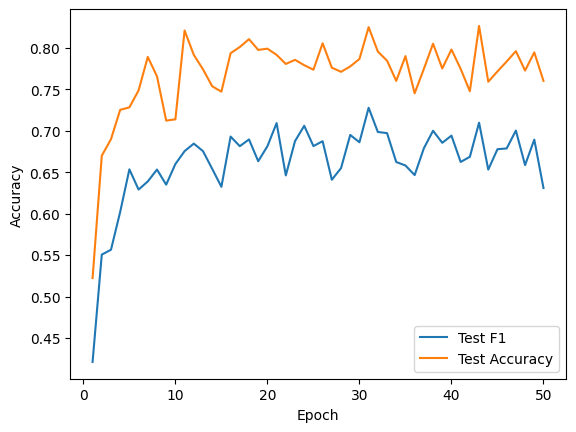

Best Accuracy: {'Acc': 0.8267598602096855, 'F1': 0.7099307500756193, 'Epoch': 43}
Best Macro-F1: {'Acc': 0.8252621068397404, 'F1': 0.7279651779094886, 'Epoch': 31}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.93 seconds
Total Training Time per Epoch: 46.31 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 13.10 seconds


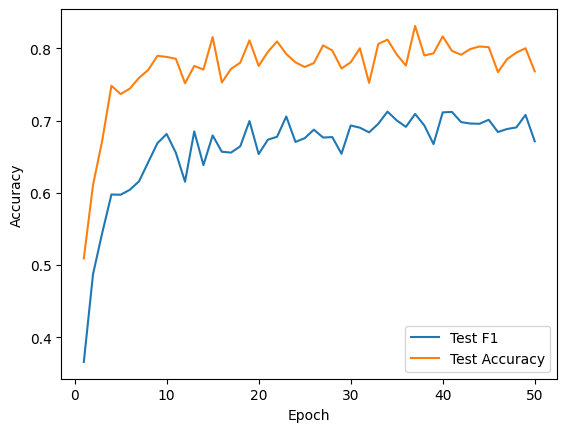

Best Accuracy: {'Acc': 0.8312531203195207, 'F1': 0.7093586754693347, 'Epoch': 37}
Best Macro-F1: {'Acc': 0.8122815776335497, 'F1': 0.7126033411040041, 'Epoch': 34}
##################################################  Shift -0.7  ##################################################


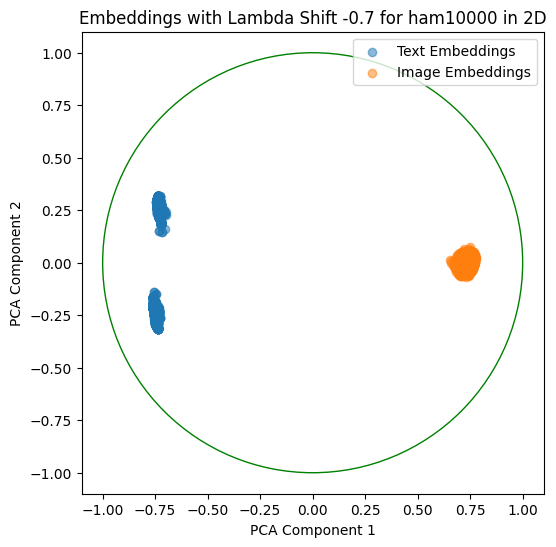

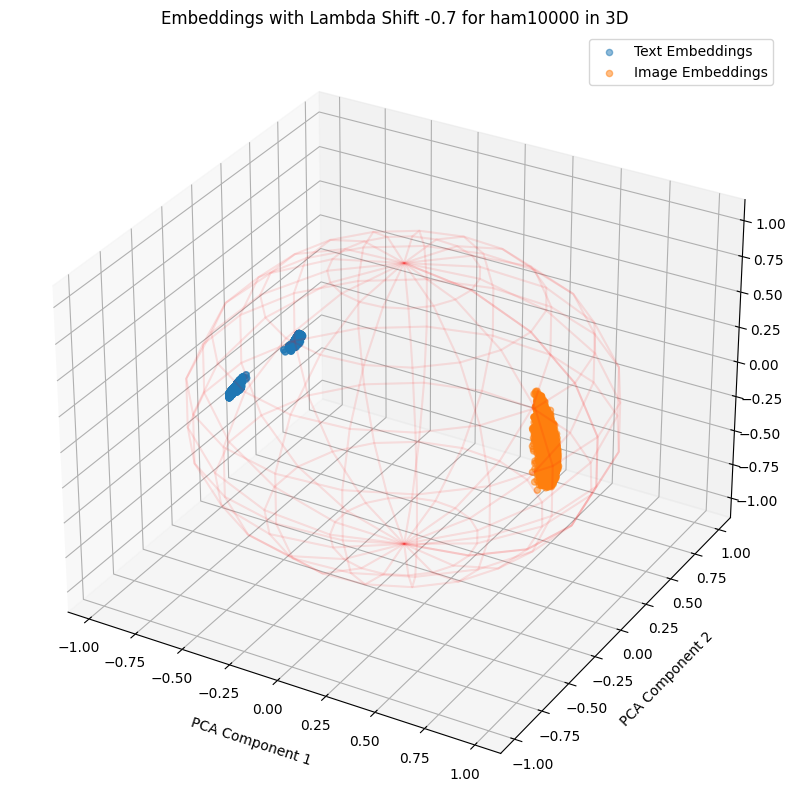

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.82 seconds
Total Training Time per Epoch: 40.85 seconds
Average Inference Time per Epoch: 0.25 seconds
Total Inference Time per Epoch: 12.69 seconds


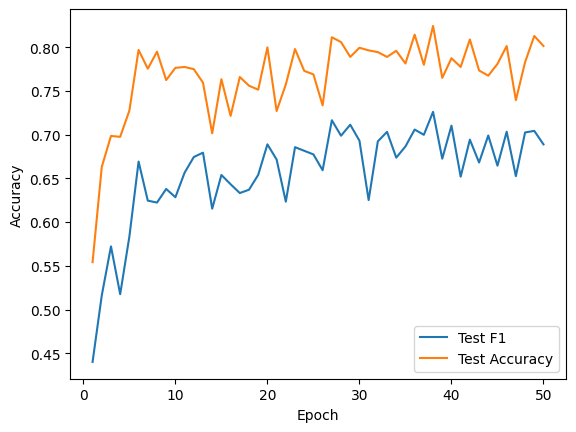

Best Accuracy: {'Acc': 0.8242636045931103, 'F1': 0.7259977093236994, 'Epoch': 38}
Best Macro-F1: {'Acc': 0.8242636045931103, 'F1': 0.7259977093236994, 'Epoch': 38}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.92 seconds
Total Training Time per Epoch: 45.84 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 12.90 seconds


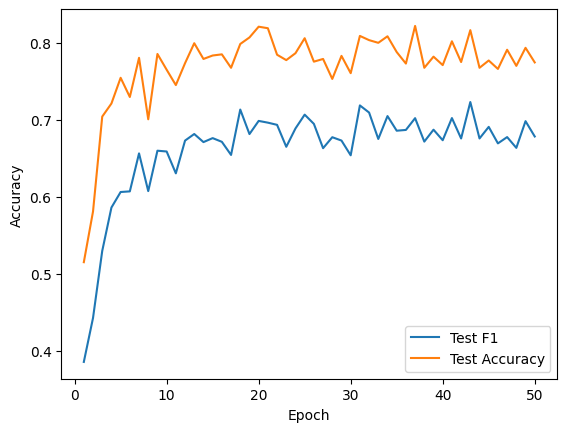

Best Accuracy: {'Acc': 0.8222666000998502, 'F1': 0.7023914860191066, 'Epoch': 37}
Best Macro-F1: {'Acc': 0.8167748377433849, 'F1': 0.7233553632019394, 'Epoch': 43}
##################################################  Shift -0.6  ##################################################


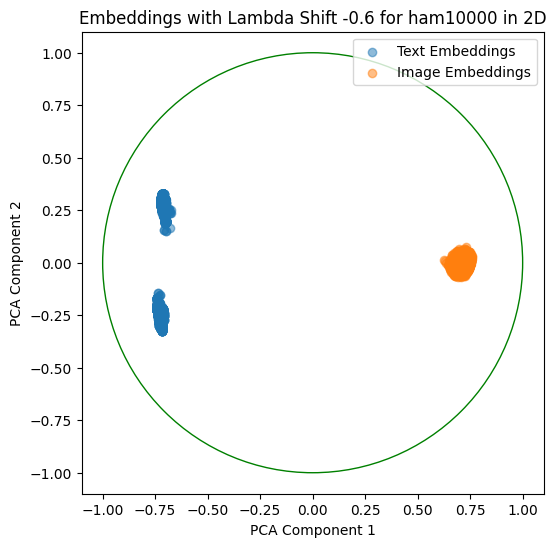

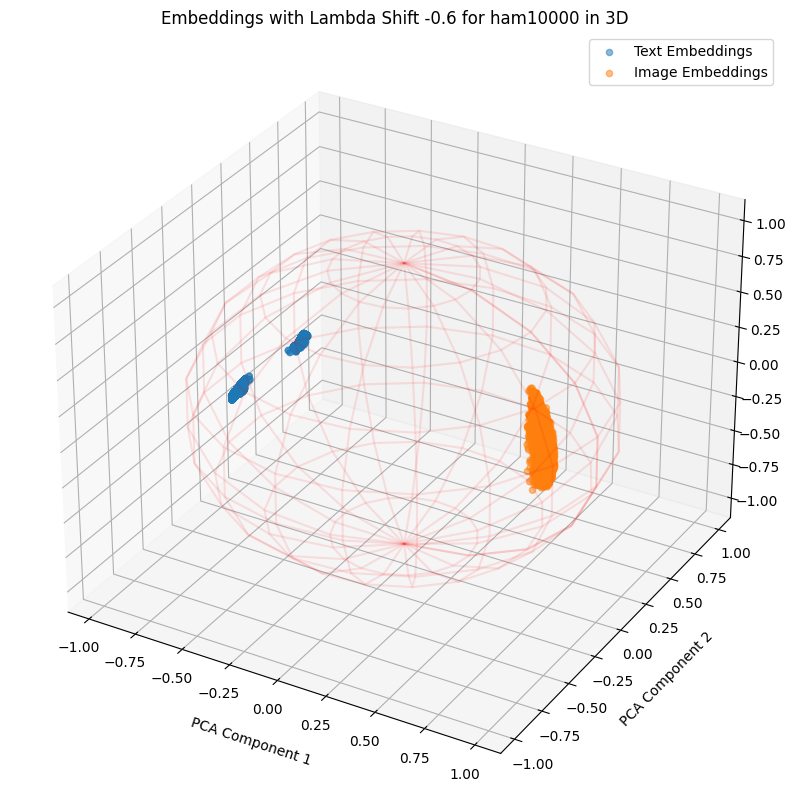

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.77 seconds
Total Training Time per Epoch: 38.49 seconds
Average Inference Time per Epoch: 0.24 seconds
Total Inference Time per Epoch: 12.23 seconds


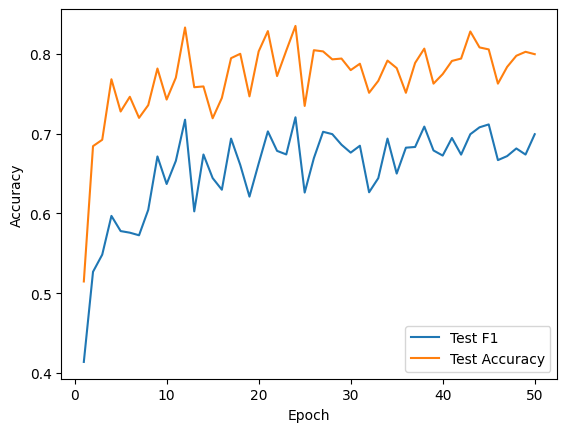

Best Accuracy: {'Acc': 0.835247129306041, 'F1': 0.7206722686795127, 'Epoch': 24}
Best Macro-F1: {'Acc': 0.835247129306041, 'F1': 0.7206722686795127, 'Epoch': 24}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.91 seconds
Total Training Time per Epoch: 45.57 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 13.08 seconds


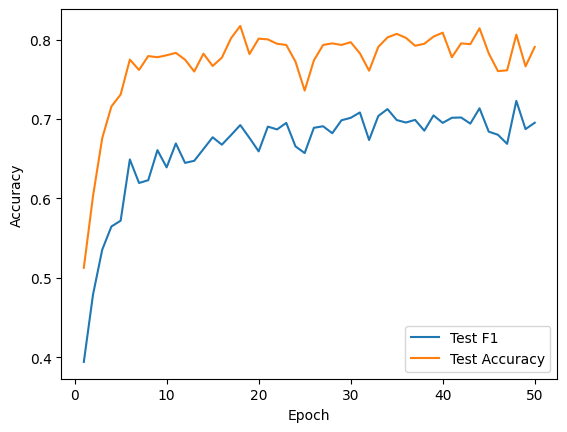

Best Accuracy: {'Acc': 0.8172740888666999, 'F1': 0.6924065557626621, 'Epoch': 18}
Best Macro-F1: {'Acc': 0.8062905641537693, 'F1': 0.7228805104052194, 'Epoch': 48}
##################################################  Shift -0.5  ##################################################


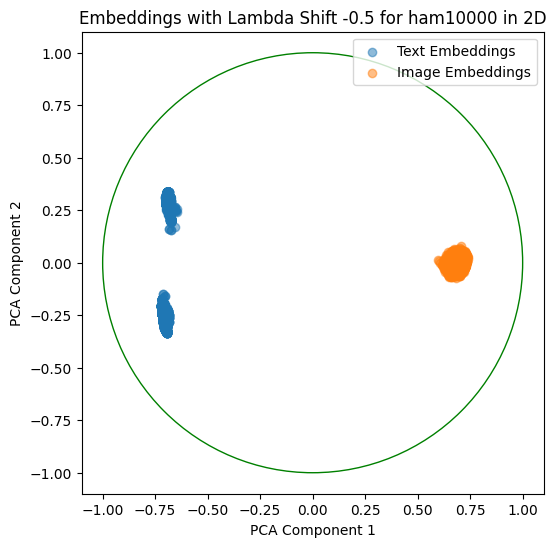

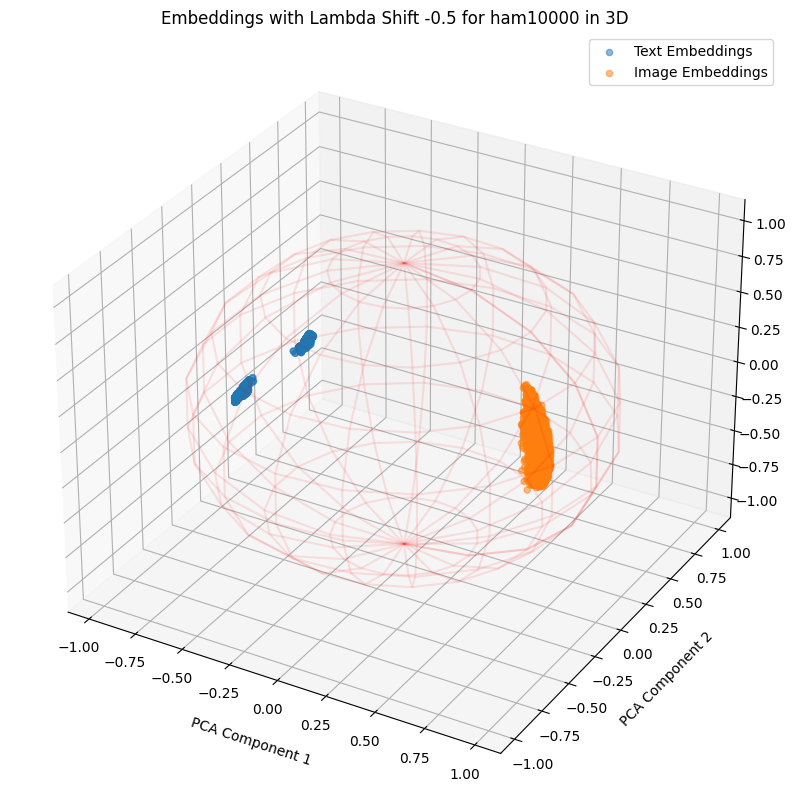

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.80 seconds
Total Training Time per Epoch: 40.22 seconds
Average Inference Time per Epoch: 0.25 seconds
Total Inference Time per Epoch: 12.58 seconds


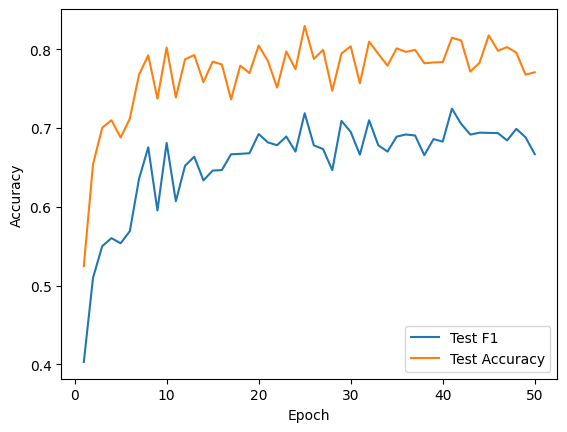

Best Accuracy: {'Acc': 0.8297553669495756, 'F1': 0.7188217527035751, 'Epoch': 25}
Best Macro-F1: {'Acc': 0.8147778332501248, 'F1': 0.7246977380705031, 'Epoch': 41}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.91 seconds
Total Training Time per Epoch: 45.63 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 12.96 seconds


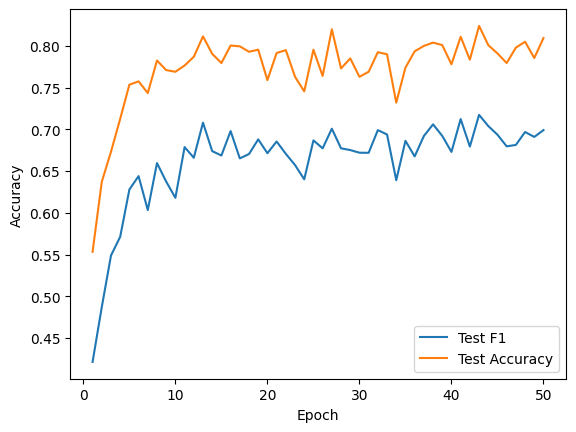

Best Accuracy: {'Acc': 0.8237643534697953, 'F1': 0.717215650016337, 'Epoch': 43}
Best Macro-F1: {'Acc': 0.8237643534697953, 'F1': 0.717215650016337, 'Epoch': 43}
##################################################  Shift -0.4  ##################################################


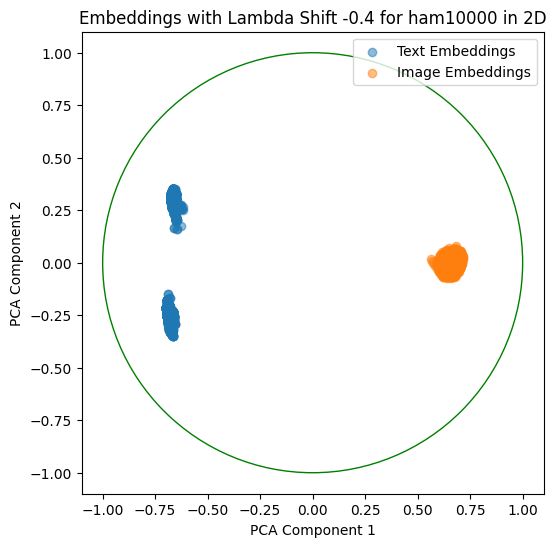

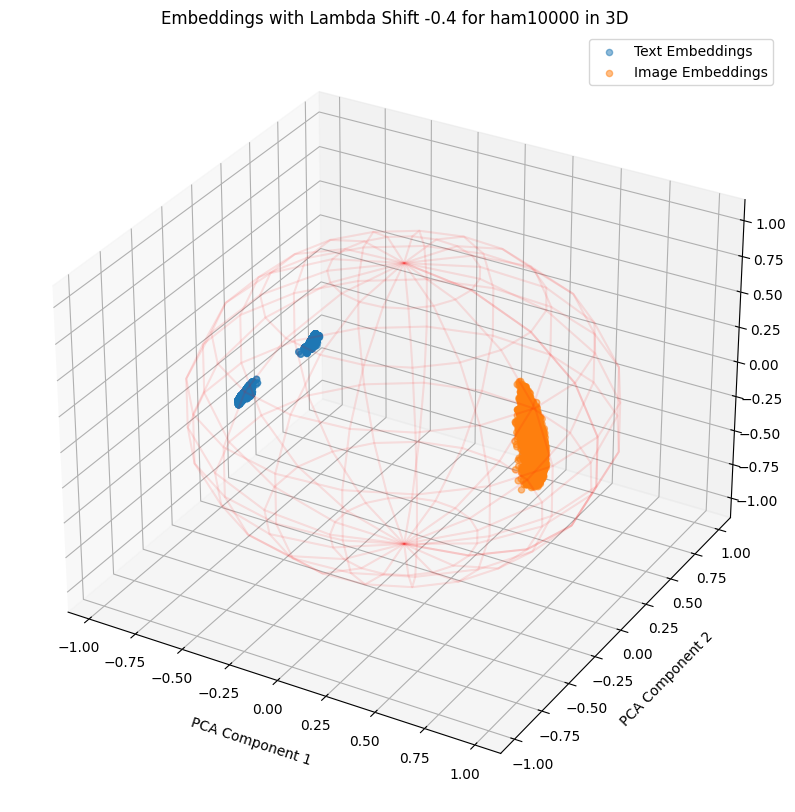

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.81 seconds
Total Training Time per Epoch: 40.49 seconds
Average Inference Time per Epoch: 0.25 seconds
Total Inference Time per Epoch: 12.36 seconds


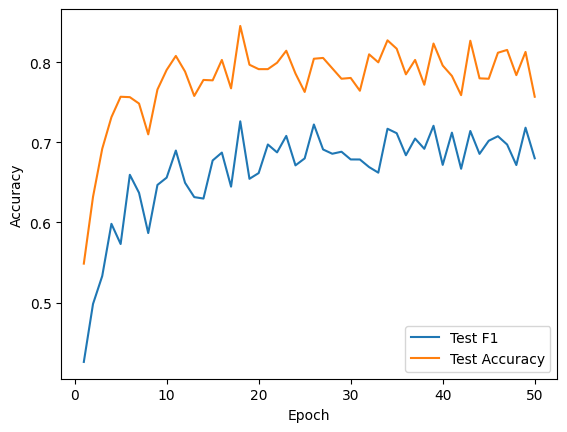

Best Accuracy: {'Acc': 0.8452321517723415, 'F1': 0.7261969081492009, 'Epoch': 18}
Best Macro-F1: {'Acc': 0.8452321517723415, 'F1': 0.7261969081492009, 'Epoch': 18}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.94 seconds
Total Training Time per Epoch: 46.80 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 12.87 seconds


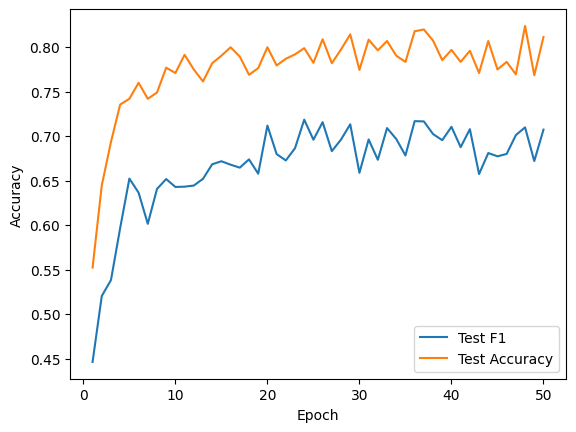

Best Accuracy: {'Acc': 0.8237643534697953, 'F1': 0.7097353033203876, 'Epoch': 48}
Best Macro-F1: {'Acc': 0.7988017973040439, 'F1': 0.7184168631846041, 'Epoch': 24}
##################################################  Shift -0.3  ##################################################


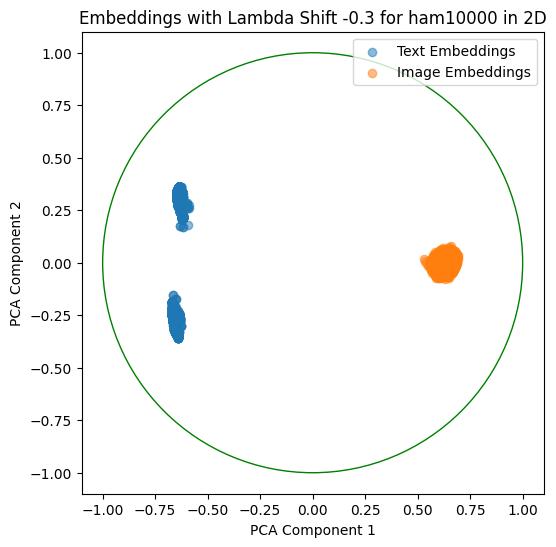

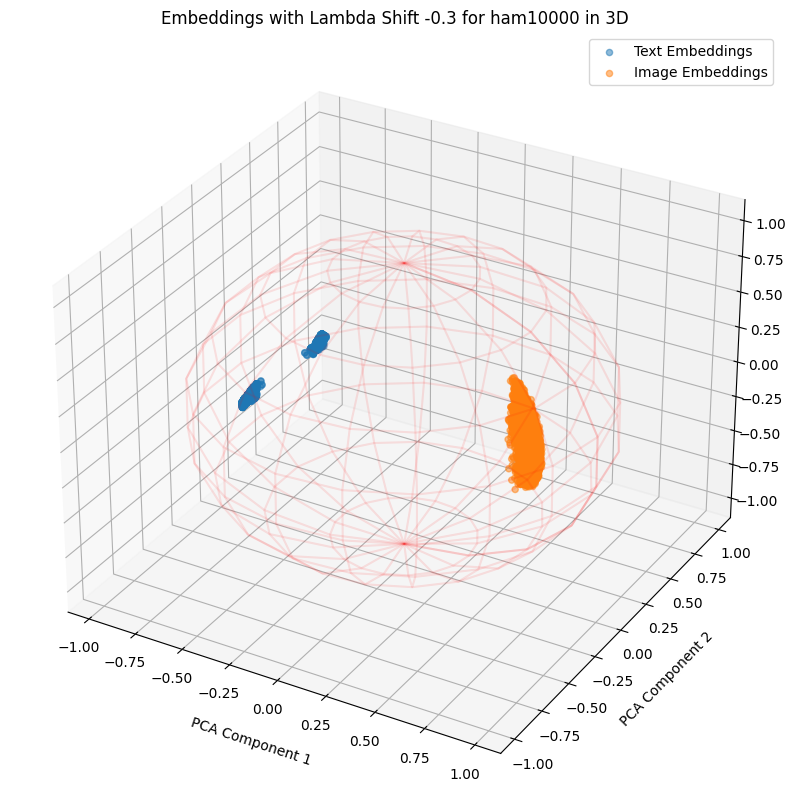

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.78 seconds
Total Training Time per Epoch: 38.91 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 12.90 seconds


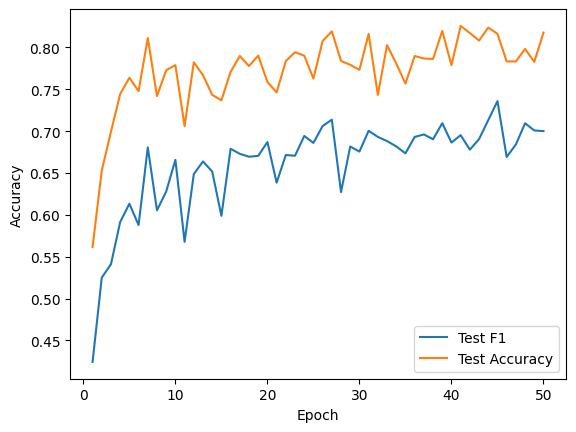

Best Accuracy: {'Acc': 0.8257613579630554, 'F1': 0.6952528844338166, 'Epoch': 41}
Best Macro-F1: {'Acc': 0.8162755866200699, 'F1': 0.7359521514878763, 'Epoch': 45}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.94 seconds
Total Training Time per Epoch: 47.03 seconds
Average Inference Time per Epoch: 0.26 seconds
Total Inference Time per Epoch: 13.04 seconds


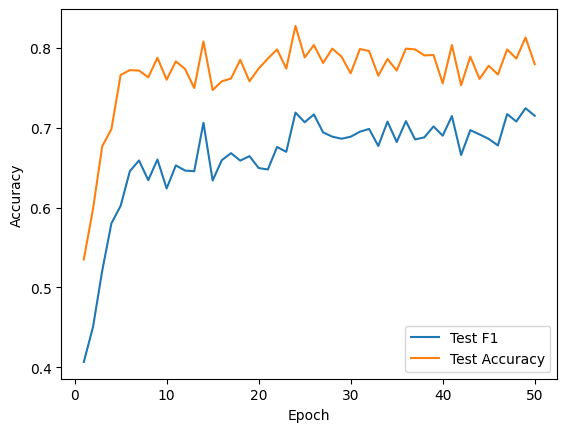

Best Accuracy: {'Acc': 0.8277583624563155, 'F1': 0.719150762386554, 'Epoch': 24}
Best Macro-F1: {'Acc': 0.8132800798801797, 'F1': 0.7246253278798466, 'Epoch': 49}
##################################################  Shift -0.2  ##################################################


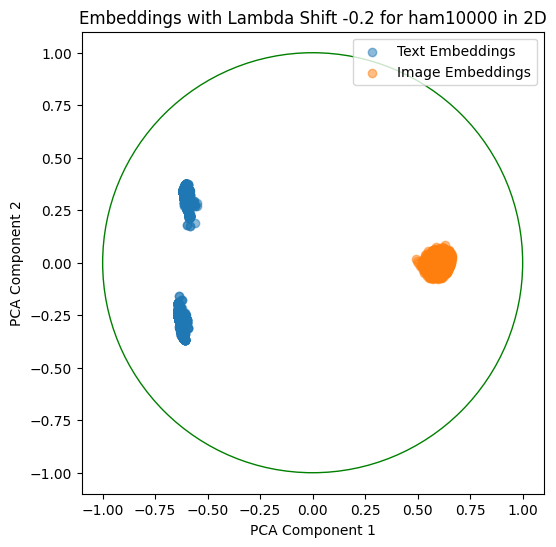

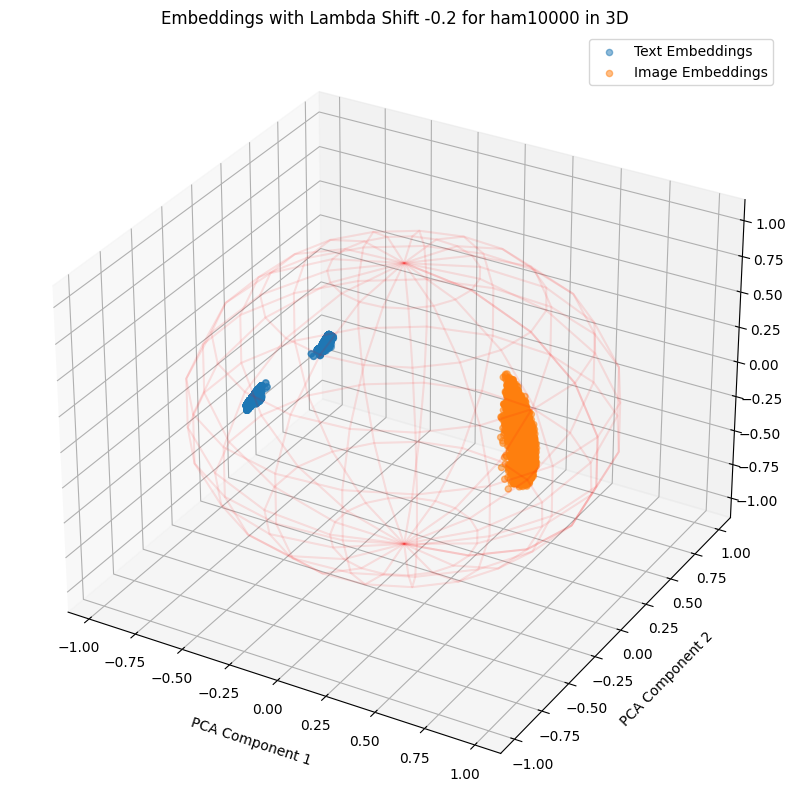

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.77 seconds
Total Training Time per Epoch: 38.65 seconds
Average Inference Time per Epoch: 0.24 seconds
Total Inference Time per Epoch: 11.98 seconds


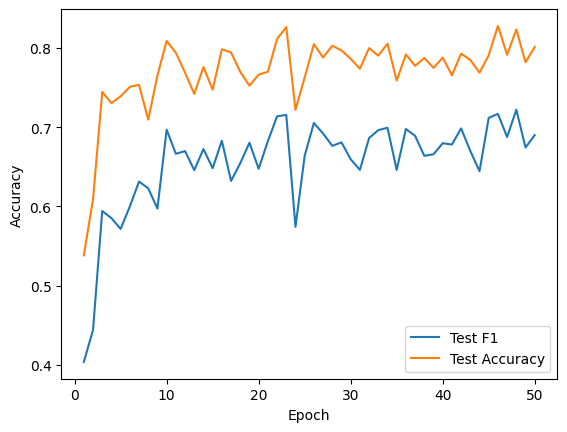

Best Accuracy: {'Acc': 0.8277583624563155, 'F1': 0.7167417676286275, 'Epoch': 46}
Best Macro-F1: {'Acc': 0.8232651023464803, 'F1': 0.7220464553088183, 'Epoch': 48}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.93 seconds
Total Training Time per Epoch: 46.51 seconds
Average Inference Time per Epoch: 0.25 seconds
Total Inference Time per Epoch: 12.67 seconds


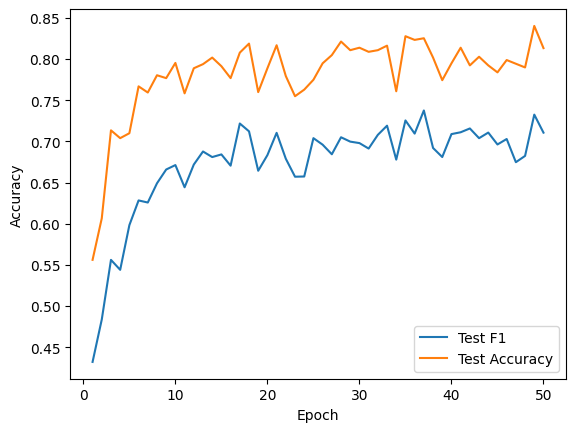

Best Accuracy: {'Acc': 0.8402396405391912, 'F1': 0.7325106011662593, 'Epoch': 49}
Best Macro-F1: {'Acc': 0.8252621068397404, 'F1': 0.7375549934963025, 'Epoch': 37}
##################################################  Shift -0.1  ##################################################


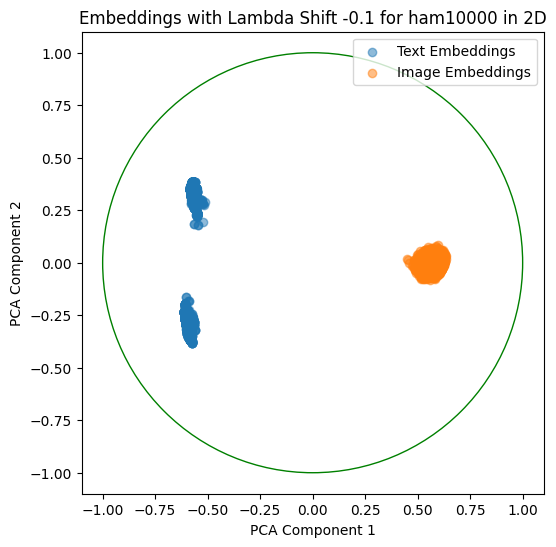

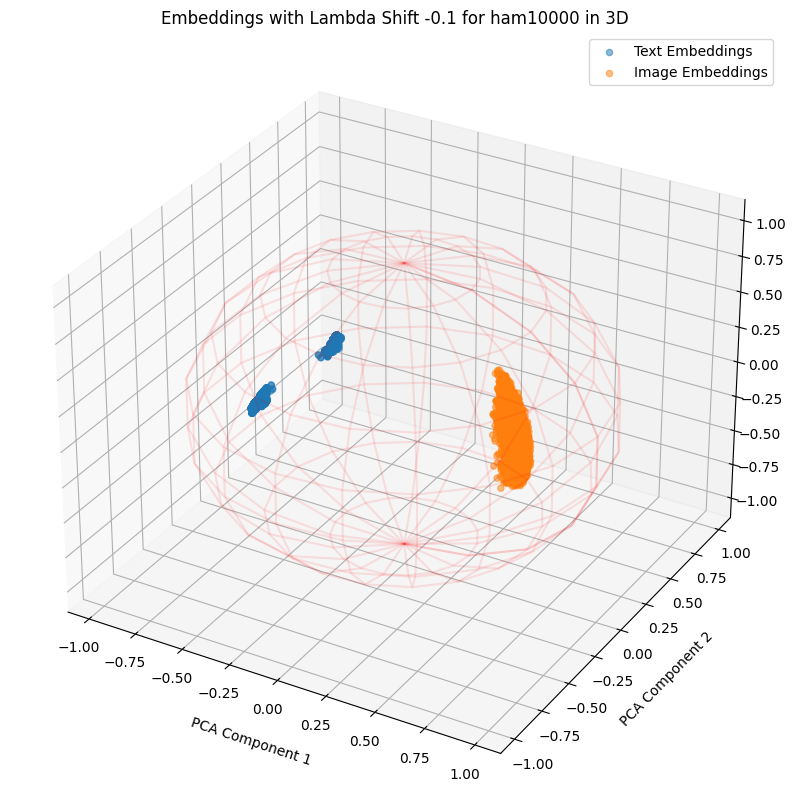

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.50 seconds
Total Training Time per Epoch: 24.81 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.03 seconds


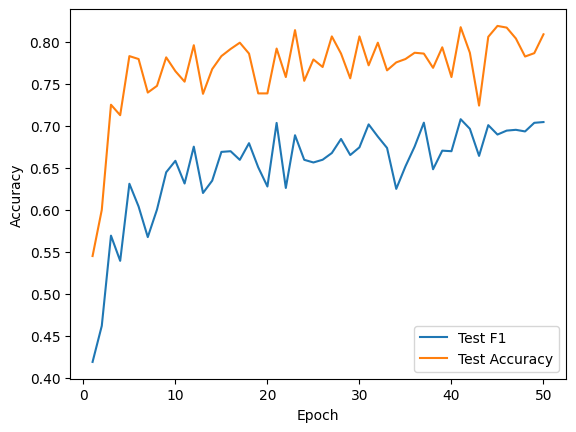

Best Accuracy: {'Acc': 0.818771842236645, 'F1': 0.6893895444868632, 'Epoch': 45}
Best Macro-F1: {'Acc': 0.8172740888666999, 'F1': 0.7076639433239263, 'Epoch': 41}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.54 seconds
Total Training Time per Epoch: 26.85 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 7.98 seconds


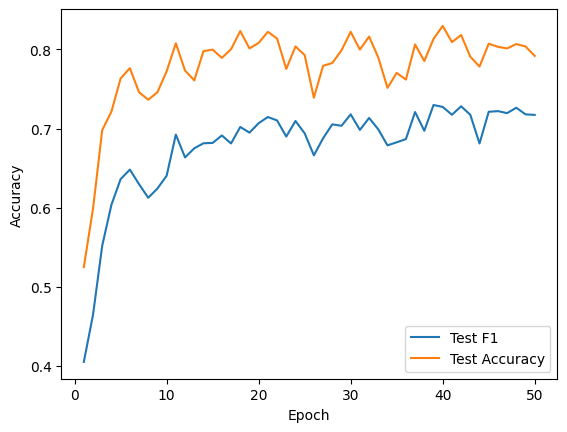

Best Accuracy: {'Acc': 0.8297553669495756, 'F1': 0.7273169133047604, 'Epoch': 40}
Best Macro-F1: {'Acc': 0.8132800798801797, 'F1': 0.7297154428821379, 'Epoch': 39}
##################################################  Shift 0  ##################################################


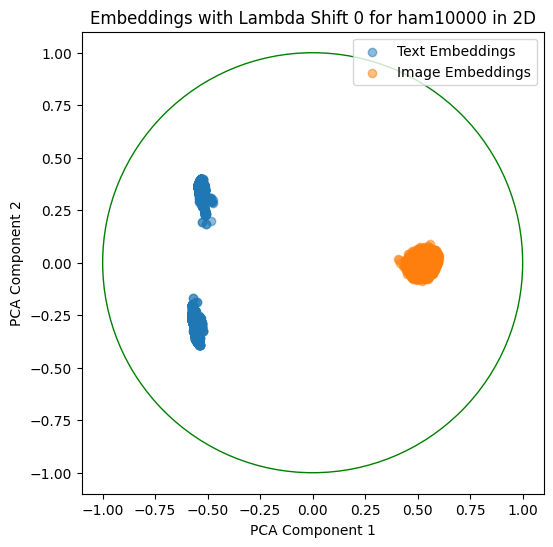

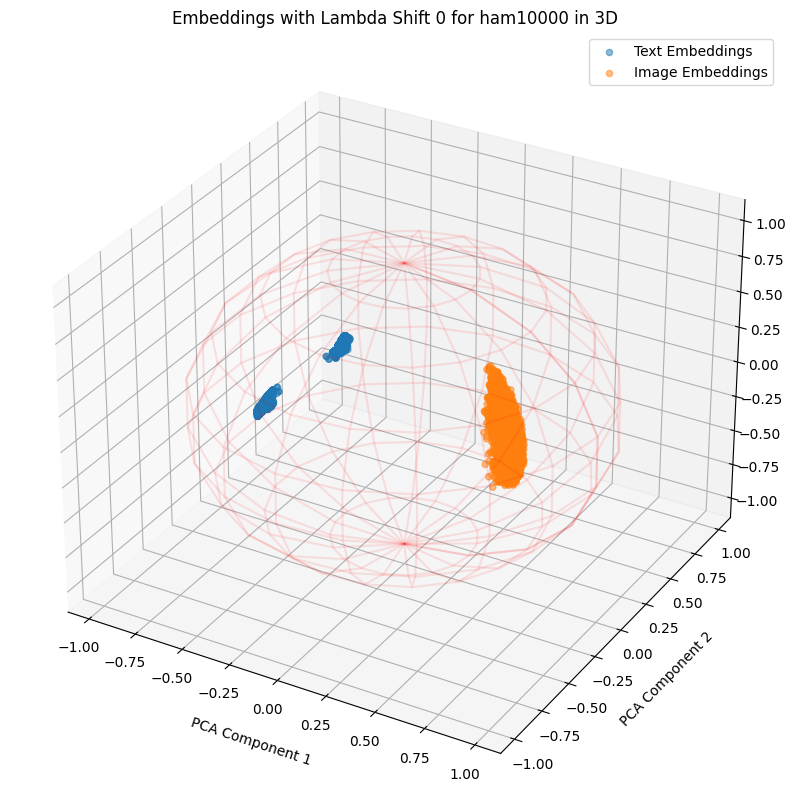

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.49 seconds
Total Training Time per Epoch: 24.71 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 7.99 seconds


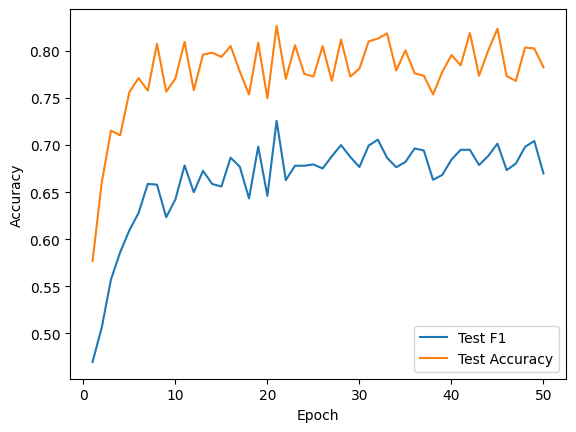

Best Accuracy: {'Acc': 0.8267598602096855, 'F1': 0.7258826454548796, 'Epoch': 21}
Best Macro-F1: {'Acc': 0.8267598602096855, 'F1': 0.7258826454548796, 'Epoch': 21}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.54 seconds
Total Training Time per Epoch: 26.78 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.08 seconds


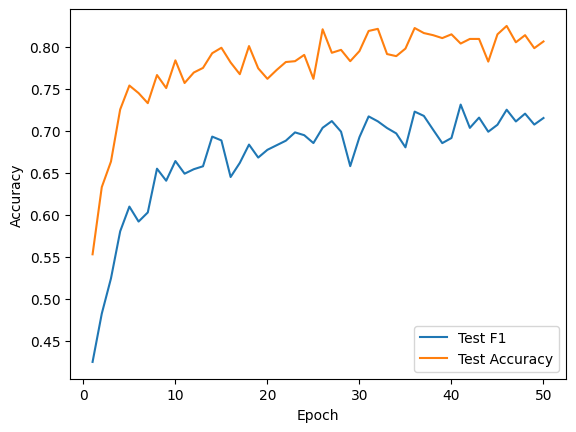

Best Accuracy: {'Acc': 0.8247628557164254, 'F1': 0.7251181080380624, 'Epoch': 46}
Best Macro-F1: {'Acc': 0.8037943085371942, 'F1': 0.7312127625868351, 'Epoch': 41}
##################################################  Shift 0.1  ##################################################


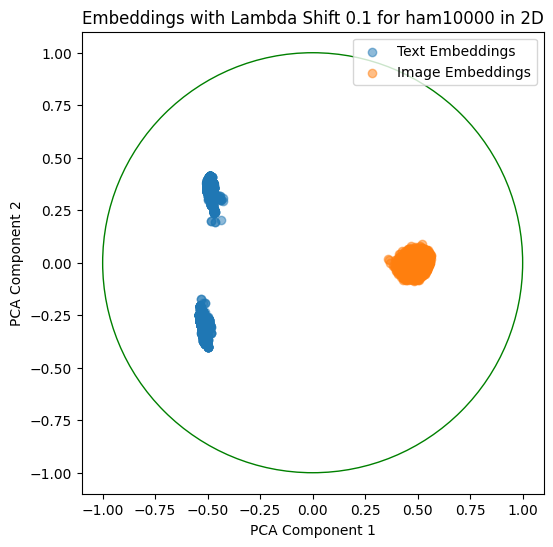

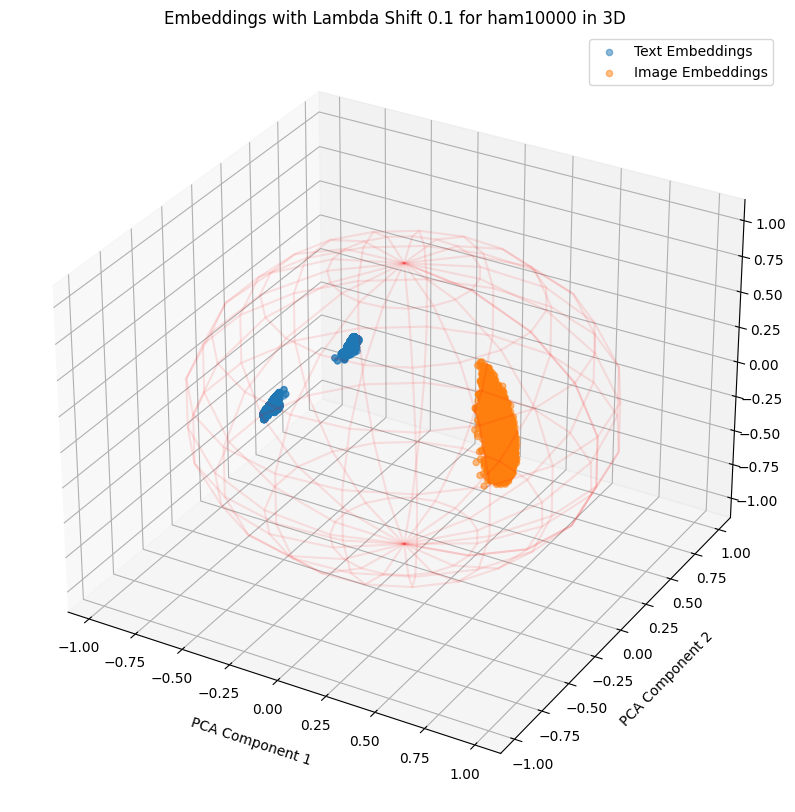

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.49 seconds
Total Training Time per Epoch: 24.50 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.05 seconds


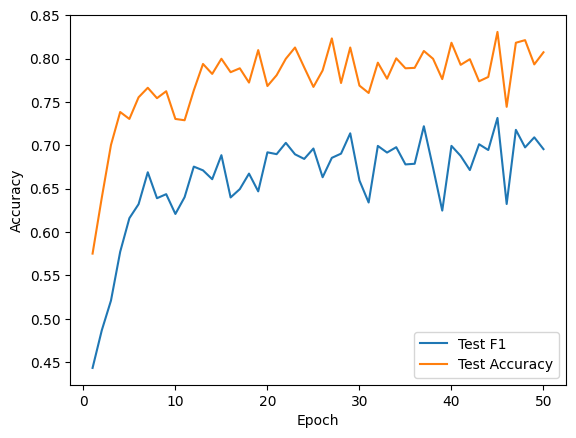

Best Accuracy: {'Acc': 0.8307538691962056, 'F1': 0.7315957321847933, 'Epoch': 45}
Best Macro-F1: {'Acc': 0.8307538691962056, 'F1': 0.7315957321847933, 'Epoch': 45}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.54 seconds
Total Training Time per Epoch: 26.86 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.07 seconds


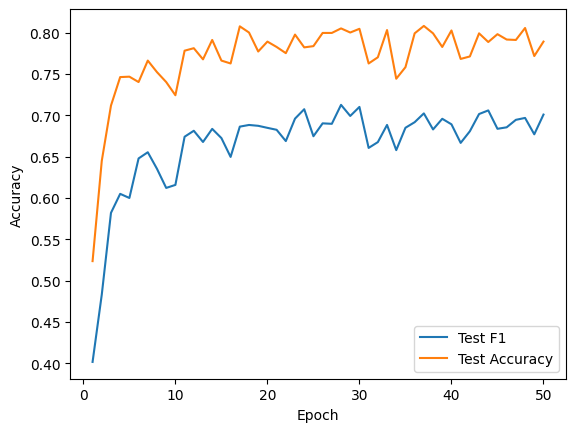

Best Accuracy: {'Acc': 0.8082875686470294, 'F1': 0.7024561102602735, 'Epoch': 37}
Best Macro-F1: {'Acc': 0.8052920619071393, 'F1': 0.7127678654697345, 'Epoch': 28}
##################################################  Shift 0.2  ##################################################


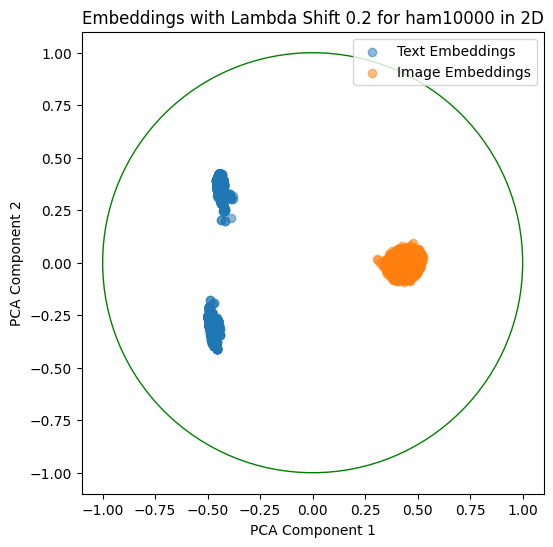

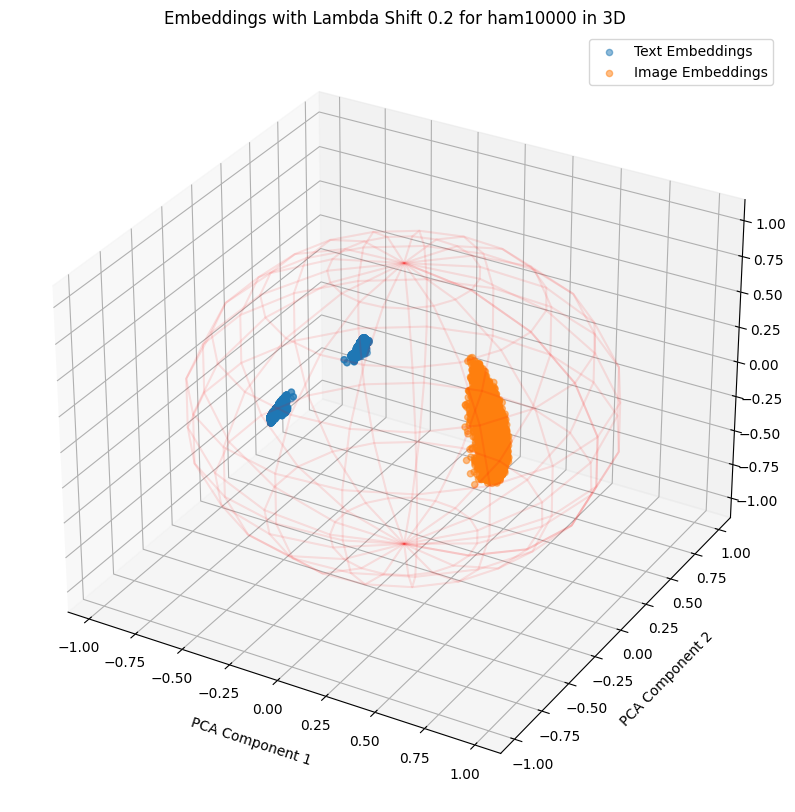

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.51 seconds
Total Training Time per Epoch: 25.27 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.14 seconds


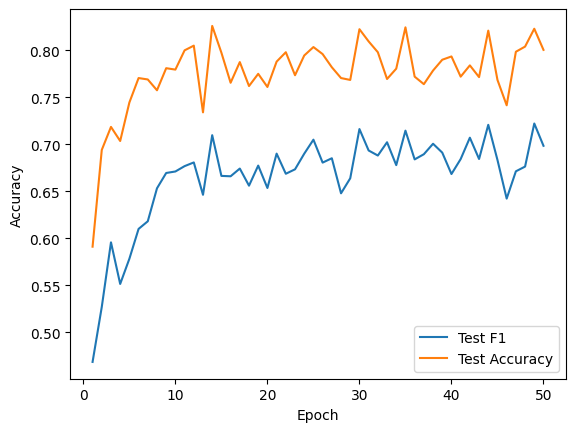

Best Accuracy: {'Acc': 0.8257613579630554, 'F1': 0.7096452880201551, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.8227658512231653, 'F1': 0.7220272721513122, 'Epoch': 49}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.55 seconds
Total Training Time per Epoch: 27.48 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.22 seconds


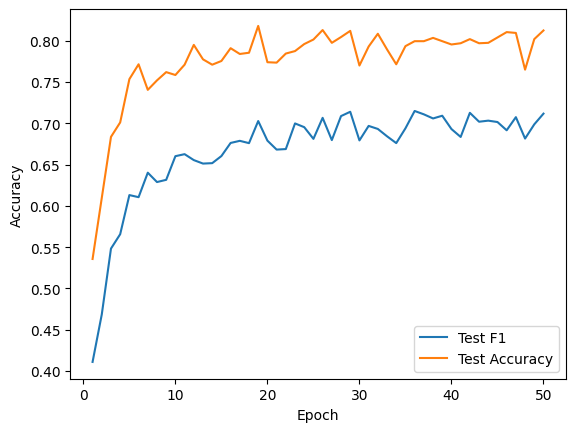

Best Accuracy: {'Acc': 0.817773339990015, 'F1': 0.7026544409275466, 'Epoch': 19}
Best Macro-F1: {'Acc': 0.7993010484273589, 'F1': 0.7148338733632166, 'Epoch': 36}
##################################################  Shift 0.3  ##################################################


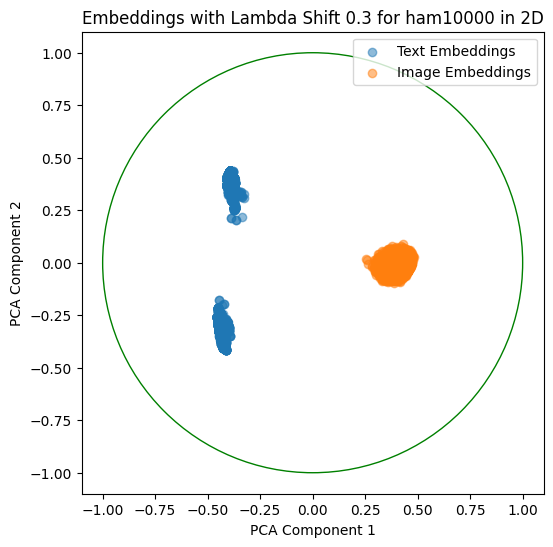

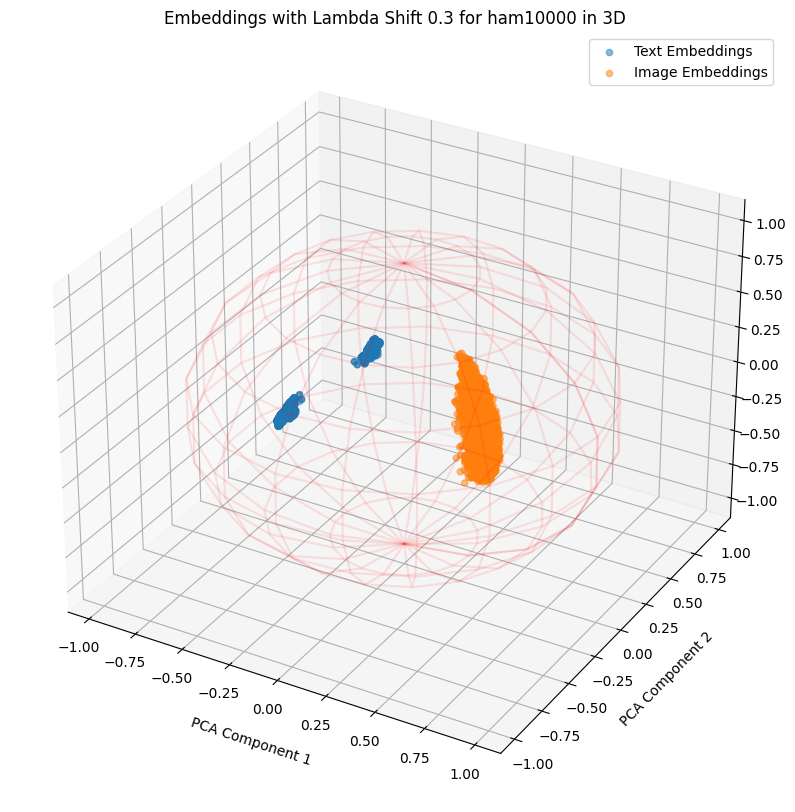

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.49 seconds
Total Training Time per Epoch: 24.68 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.15 seconds


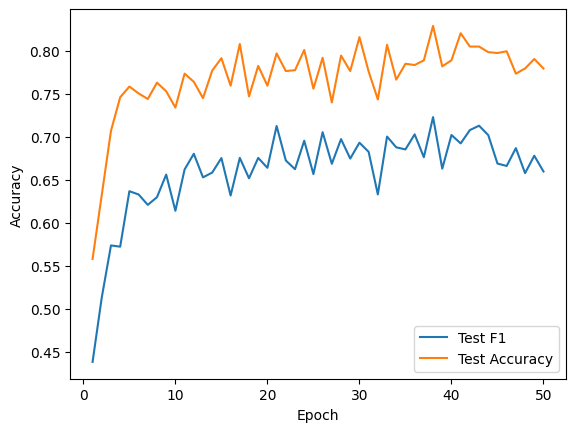

Best Accuracy: {'Acc': 0.8287568647029456, 'F1': 0.7228695331023702, 'Epoch': 38}
Best Macro-F1: {'Acc': 0.8287568647029456, 'F1': 0.7228695331023702, 'Epoch': 38}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.54 seconds
Total Training Time per Epoch: 27.16 seconds
Average Inference Time per Epoch: 0.17 seconds
Total Inference Time per Epoch: 8.27 seconds


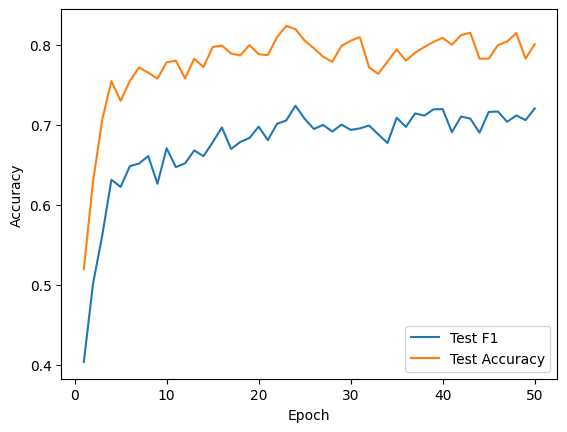

Best Accuracy: {'Acc': 0.8237643534697953, 'F1': 0.705602154557539, 'Epoch': 23}
Best Macro-F1: {'Acc': 0.8197703444832751, 'F1': 0.7239921798185657, 'Epoch': 24}
##################################################  Shift 0.4  ##################################################


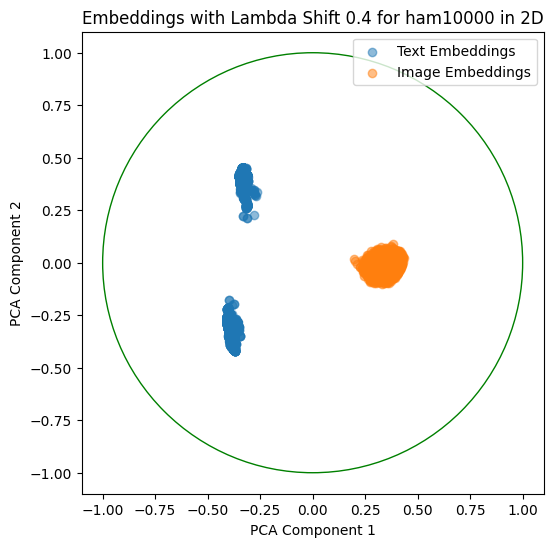

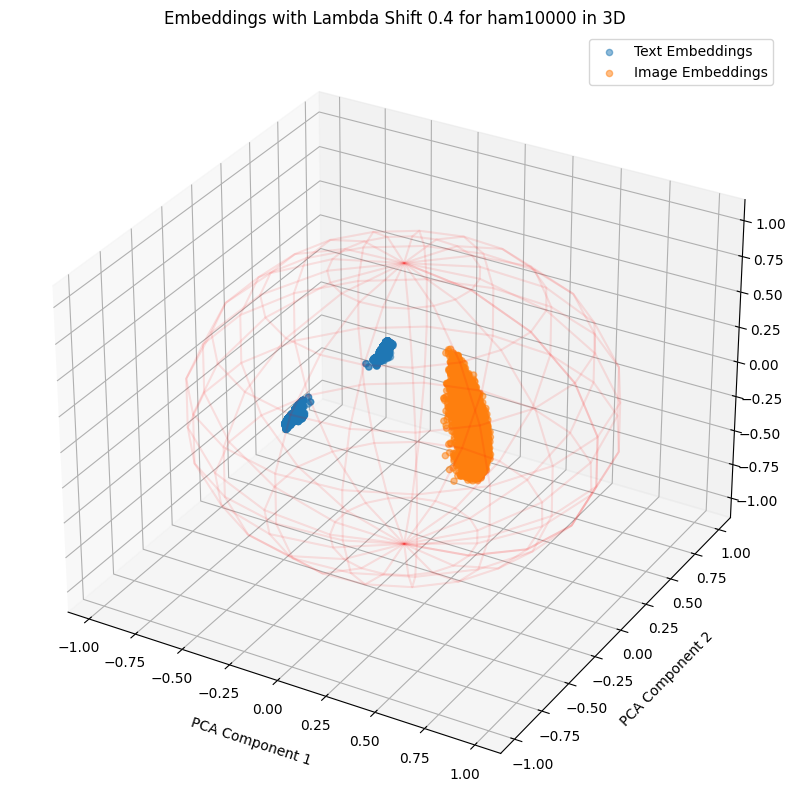

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.49 seconds
Total Training Time per Epoch: 24.54 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.06 seconds


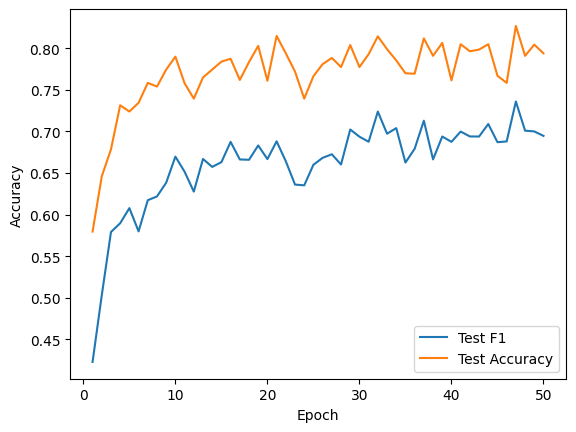

Best Accuracy: {'Acc': 0.8267598602096855, 'F1': 0.7359360473952817, 'Epoch': 47}
Best Macro-F1: {'Acc': 0.8267598602096855, 'F1': 0.7359360473952817, 'Epoch': 47}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.55 seconds
Total Training Time per Epoch: 27.28 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 7.94 seconds


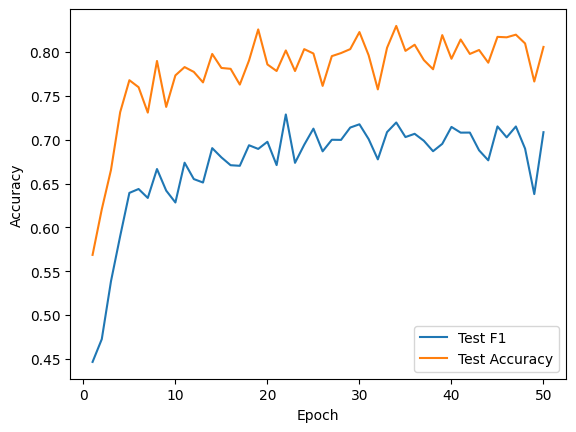

Best Accuracy: {'Acc': 0.8297553669495756, 'F1': 0.7196461797896211, 'Epoch': 34}
Best Macro-F1: {'Acc': 0.8017973040439341, 'F1': 0.7287989718657009, 'Epoch': 22}
##################################################  Shift 0.5  ##################################################


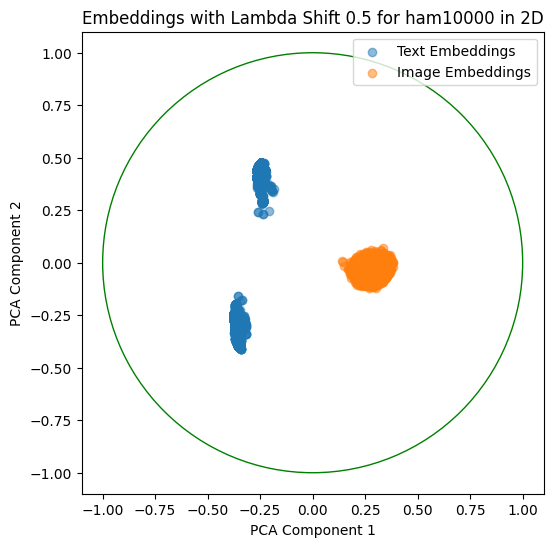

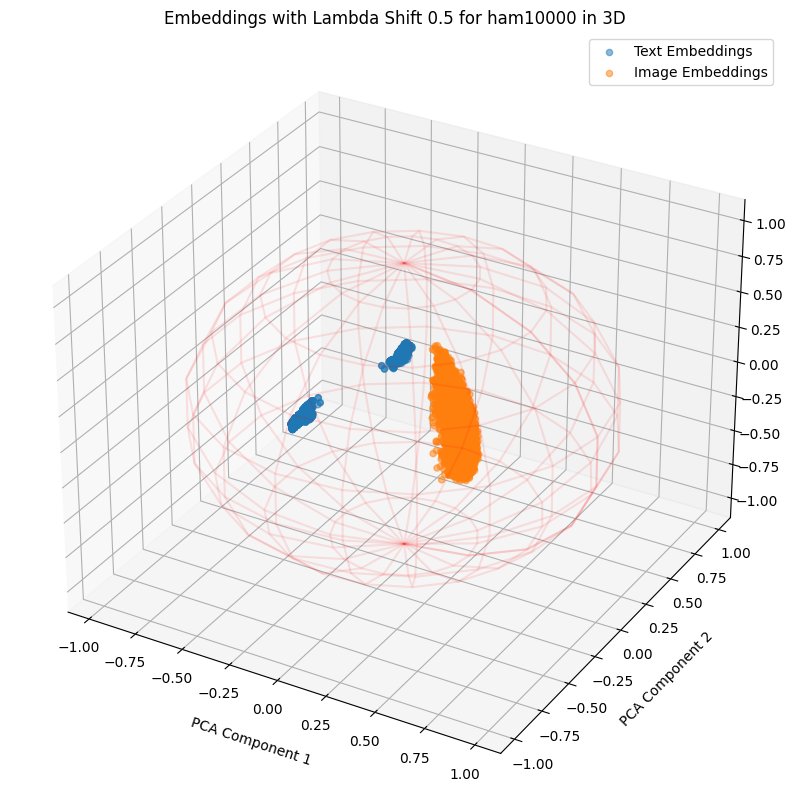

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359
Average Training Time per Epoch: 0.51 seconds
Total Training Time per Epoch: 25.27 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.13 seconds


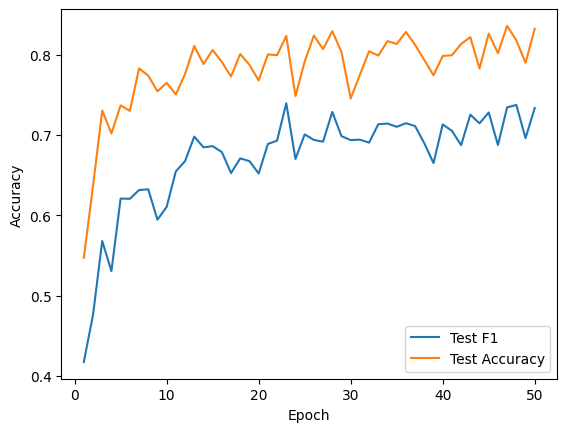

Best Accuracy: {'Acc': 0.835746380429356, 'F1': 0.7343426276044378, 'Epoch': 47}
Best Macro-F1: {'Acc': 0.8232651023464803, 'F1': 0.739501784083009, 'Epoch': 23}
Training Late Fusion Model:
The number of parameters of the model are: 66823
Average Training Time per Epoch: 0.56 seconds
Total Training Time per Epoch: 27.80 seconds
Average Inference Time per Epoch: 0.16 seconds
Total Inference Time per Epoch: 8.07 seconds


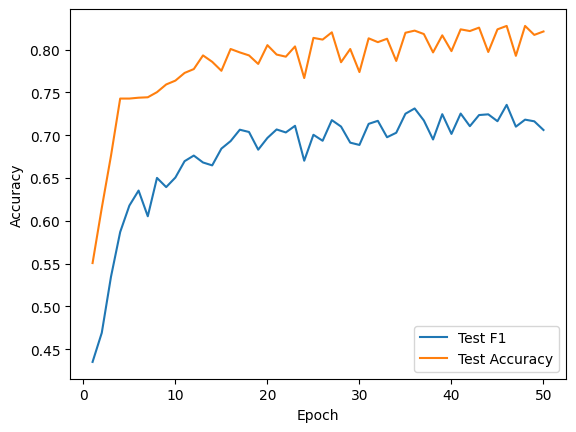

Best Accuracy: {'Acc': 0.8277583624563155, 'F1': 0.7355349844762372, 'Epoch': 46}
Best Macro-F1: {'Acc': 0.8277583624563155, 'F1': 0.7355349844762372, 'Epoch': 46}
##################################################  Shift 0.6  ##################################################


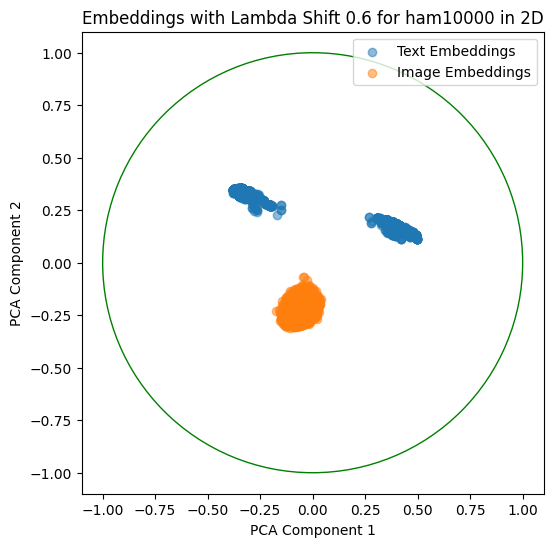

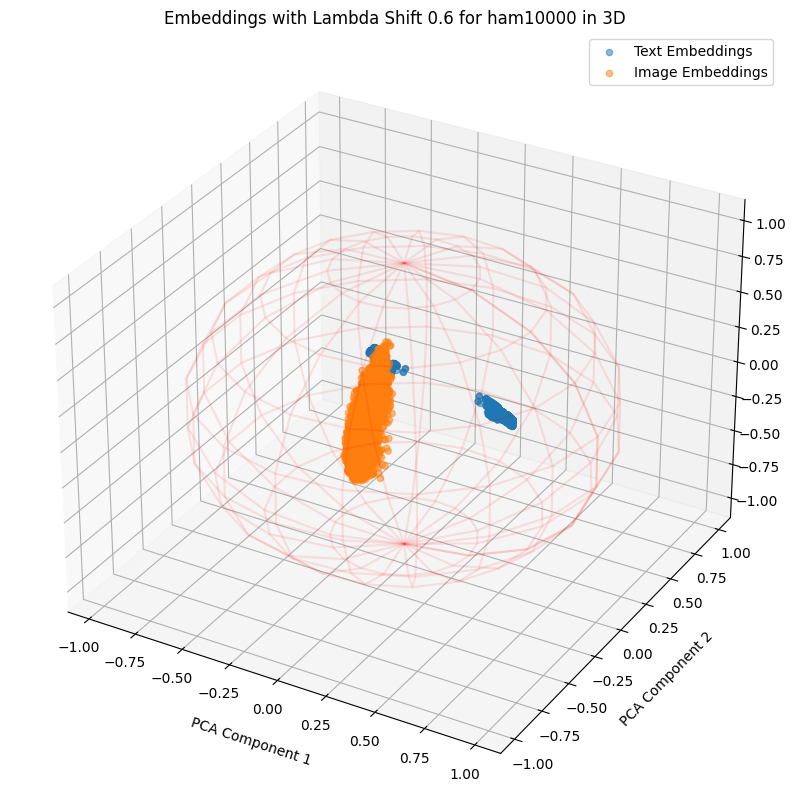

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)
Training Early Fusion Model:
The number of parameters of the model are: 132359


In [ ]:
# Assuming df is your DataFrame
lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart
#lambda_shift_values = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update column names based on the new dimensions
    if text_embeddings.shape[1] < text_embeddings_shifted.shape[1]:
        text_columns_updated = update_column_names(text_columns, text_embeddings_shifted.shape[1])
    else: 
        text_columns_updated = text_columns
        
    if image_embeddings.shape[1] < image_embeddings_shifted.shape[1]: 
        image_columns_updated = update_column_names(image_columns, image_embeddings_shifted.shape[1])
    else:
        image_columns_updated = image_columns
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns_updated] = text_embeddings_shifted
    df_shifted[image_columns_updated] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:
    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False, lr=lr)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False, lr=lr)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"late_({lambda_shift})"] = best

In [ ]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")

In [ ]:
plot_results(results, lambda_shift_values, DATASET)